Downloading...
From: https://drive.google.com/uc?id=1rHAHyhvr_0adToHaxvSaWgPa3h3PPvoO
To: /content/Dataset_CT-Scan.rar
100%|██████████| 9.03M/9.03M [00:00<00:00, 18.3MB/s]


Found 767 images belonging to 3 classes.
Found 109 images belonging to 3 classes.
Found 221 images belonging to 3 classes.
Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


24/24 ━━━━━━━━━━━━━━━━━━━━ 189s 4s/step - accuracy: 0.6224 - loss: 0.9805 - val_accuracy: 0.5138 - val_loss: 1.2001
Epoch 2/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 425ms/step - accuracy: 0.8251 - loss: 0.4459 - val_accuracy: 0.5138 - val_loss: 1.1954
Epoch 3/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 437ms/step - accuracy: 0.9012 - loss: 0.2172 - val_accuracy: 0.5138 - val_loss: 2.0634
Epoch 4/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 430ms/step - accuracy: 0.9656 - loss: 0.0988 - val_accuracy: 0.5138 - val_loss: 2.5217
Epoch 5/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 20s 421ms/step - accuracy: 0.9543 - loss: 0.1243 - val_accuracy: 0.5138 - val_loss: 4.2940
Epoch 6/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 420ms/step - accuracy: 0.9400 - loss: 0.1655 - val_accuracy: 0.5138 - val_loss: 7.6321
Epoch 7/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 427ms/step - accuracy: 0.9861 - loss: 0.0588 - val_accuracy: 0.5138 - val_loss: 6.8233
Epoch 8/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 429ms/step - accuracy: 0.9798 - loss: 0.0320 - val_accuracy: 0.5138 

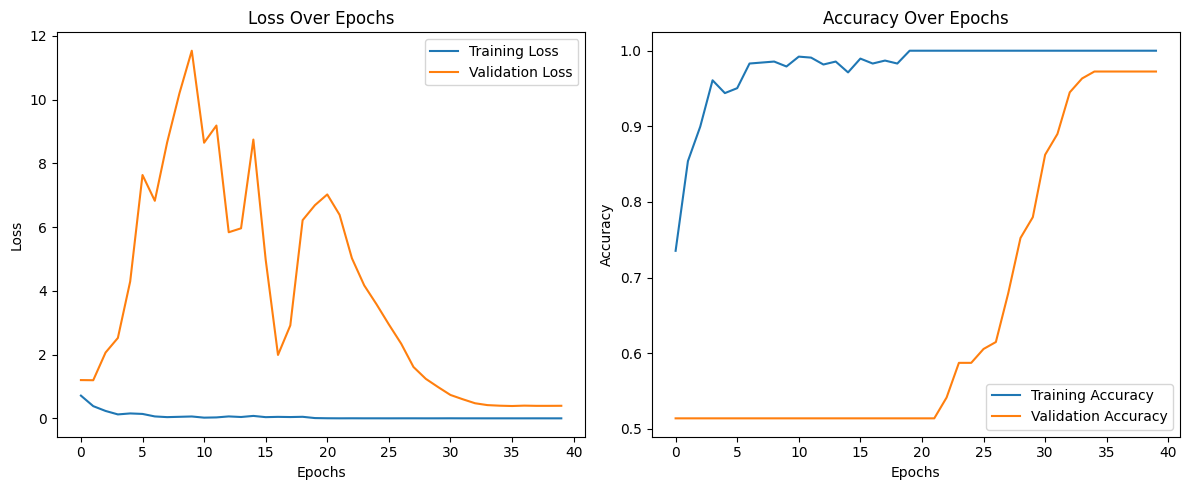

7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step

Performance on Test Data Using Inception_V3
Precision: 0.978646601250699
Recall: 0.9773755656108597
F1 Score: 0.9763871342119526
Accuracy: 0.9773755656108597
Confusion Matrix:
                  Bengin cases  Malignant cases  Normal cases
Bengin cases               19                0             5
Malignant cases             0              113             0
Normal cases                0                0            84


In [ ]:
from tensorflow.keras import backend as K
K.clear_session()
!pip install rarfile
import os
import pandas as pd
import gdown
import rarfile
import shutil
from PIL import Image
# Download the RAR file
url = 'https://drive.google.com/uc?id=1rHAHyhvr_0adToHaxvSaWgPa3h3PPvoO'
output_rar = '/content/Dataset_CT-Scan.rar'
gdown.download(url, output_rar, quiet=False)
# Extract the RAR file
with rarfile.RarFile(output_rar, 'r') as rar_ref:
    rar_ref.extractall('/content')

# Path to the extracted dataset folder

dataset = '/content/Dataset_CT-Scan'
import os
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import (
    Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, Add,
    GlobalAveragePooling2D, Flatten, Dense
)
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
)

# Directory for the dataset
data_dir = dataset

# Define the CNN architecture

# Initialize the InceptionV3 model without pre-trained weights
inception_model = InceptionV3(weights=None, include_top=False, input_shape=(299, 299, 3))
# Create a custom model for binary classification
model = models.Sequential()
# Add the InceptionV3 base
model.add(inception_model)

# Add global average pooling layer
model.add(layers.GlobalAveragePooling2D())

# Add a dense layer with 1024 units and ReLU activation
model.add(layers.Dense(1024, activation='relu'))

# Add a final output layer with 2 units and softmax activation for multi-class (2-class) classification
model.add(layers.Dense(5, activation='softmax'))  # 2 output neurons for 2 classes

# Print the model summary


# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Data generators for training, validation, and testing
train_generator = train_datagen.flow_from_directory(
    os.path.join(data_dir, 'Train'),
    target_size=(299, 299),
    batch_size=32,
    class_mode='sparse',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    os.path.join(data_dir, 'Validate'),
    target_size=(299, 299),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    os.path.join(data_dir, 'Test'),
    target_size=(299, 299),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

# Training the model
history = model.fit(train_generator, epochs=40, validation_data=val_generator)

# Plot training results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Helper function to evaluate the model on given test generator
def evaluate_model(test_generator, model, classes, title="Performance"):
    y_test_pred = model.predict(test_generator)
    y_test_pred = np.argmax(y_test_pred, axis=1)

    precision = precision_score(test_generator.labels, y_test_pred, average='weighted')
    recall = recall_score(test_generator.labels, y_test_pred, average='weighted')
    f1 = f1_score(test_generator.labels, y_test_pred, average='weighted')
    accuracy = accuracy_score(test_generator.labels, y_test_pred)

    print(f"\n{title}")
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Accuracy:", accuracy)

    # Display the confusion matrix
    confusion = confusion_matrix(test_generator.labels, y_test_pred)
    confusion_df = pd.DataFrame(confusion, index=classes, columns=classes)
    print("Confusion Matrix:\n", confusion_df)

# Test the model on the test set
evaluate_model(test_generator, model, ['Bengin cases','Malignant cases','Normal cases'], title="Performance on Test Data Using Inception_V3")


# image form of confusion matrix
# Helper function to evaluate the model on given test generator
# def evaluate_model(test_generator, model, classes, title="Performance"):
#     y_test_pred = model.predict(test_generator)
#     y_test_pred = np.argmax(y_test_pred, axis=1)

#     precision = precision_score(test_generator.labels, y_test_pred, average='weighted')
#     recall = recall_score(test_generator.labels, y_test_pred, average='weighted')
#     f1 = f1_score(test_generator.labels, y_test_pred, average='weighted')
#     accuracy = accuracy_score(test_generator.labels, y_test_pred)

#     print(f"\n{title}")
#     print("Precision:", precision)
#     print("Recall:", recall)
#     print("F1 Score:", f1)
#     print("Accuracy:", accuracy)

#     # Display the confusion matrix
#     confusion = confusion_matrix(test_generator.labels, y_test_pred)
#     confusion_df = pd.DataFrame(confusion, index=classes, columns=classes)
#     print("Confusion Matrix:\n", confusion_df)

#     # Plot confusion matrix as heatmap
#     plt.figure(figsize=(8, 6))
#     sns.heatmap(confusion_df, annot=True, cmap='Blues', fmt='g')
#     plt.title(f'Confusion Matrix - {title}')
#     plt.ylabel('True Labels')
#     plt.xlabel('Predicted Labels')
#     plt.show()